IGNORES WARNNING

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
pip install pandas as pd


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\efishery\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (2.2.2)



ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\eFishery\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


CONNECT TO SERVER 

In [17]:
!pip install pyodbc
!pip install sqlalchemy
import pyodbc
import sqlalchemy
import pandas as pd 
import numpy as np

server = 'eu-az-sql-serv1.database.windows.net'
port = '1433'
database = 'TORCHIDNANAS'
username = 'natasyakiyowo'
password = 'Natbil123#0'
driver = 'ODBC Driver 18 for SQL Server'

connection_string = f'mssql+pyodbc://{username}:{password}@{server}:{port}/{database}'

engine = sqlalchemy.create_engine(connection_string, connect_args={'driver': driver})

query = '''
SELECT Year, Month, SKU, SoldQuantity
FROM SalesperMonth;
'''
df = pd.read_sql(query, engine)

df.head()


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\eFishery\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\eFishery\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Year,Month,SKU,SoldQuantity
0,2020.0,1.0,TPL4.MC,699.0
1,2020.0,1.0,TPL4.MF,83.0
2,2020.0,1.0,TPL4.MG,21.0
3,2020.0,2.0,TPL4.MC,290.0
4,2020.0,2.0,TPL4.MF,156.0


CHECKING NAN VALUE

In [18]:
df.replace(0, np.nan, inplace=True)

print("Checking for NaN values in the DataFrame:")
nan_info = df.isna().sum()
print(nan_info)

if nan_info.any():
    print("Columns with NaN values:")
    print(nan_info[nan_info > 0])



Checking for NaN values in the DataFrame:
Year            0
Month           0
SKU             0
SoldQuantity    0
dtype: int64


IMPORT VALUE NAN or 0 with MEAN

In [19]:
import pandas as pd
import numpy as np
df = df.sort_values(by=['Year', 'Month'])

df['Year'] = df['Year'].astype(int)
unique_skus = df['SKU'].unique()

cutoff_year = 2024
cutoff_month = 3

# List to collect 
merged_dfs = []
sku_list = []

for sku in unique_skus:
    sku_df = df[df['SKU'] == sku]
    
    # Create sequence of Year and Month up to cutoff
    min_year = int(sku_df['Year'].min())
    
    all_years = np.arange(min_year, cutoff_year + 1)
    all_months = []
    
    for year in all_years:
        if year == cutoff_year:
            months = np.arange(1, cutoff_month + 1)
        else:
            months = np.arange(1, 13)
        for month in months:
            all_months.append({'Year': year, 'Month': month})
    
    all_months_df = pd.DataFrame(all_months)
    
    merged_df = pd.merge(all_months_df, sku_df, on=['Year', 'Month'], how='left')
    
    mean_sold_quantity = sku_df['SoldQuantity'].mean()
    merged_df['SoldQuantity'].fillna(mean_sold_quantity, inplace=True)
    
    merged_df['SKU'].fillna(sku, inplace=True)
    
    merged_dfs.append(merged_df)
    sku_list.append(sku)

# Print all merged DataFrames outside the loop
for sku, merged_df in zip(sku_list, merged_dfs):
    print(f'Data for SKU: {sku}')
    print(merged_df)
    print('\n')


Data for SKU: TPL4.MC
    Year  Month      SKU  SoldQuantity
0   2020      1  TPL4.MC         699.0
1   2020      2  TPL4.MC         290.0
2   2020      3  TPL4.MC         563.0
3   2020      4  TPL4.MC          97.0
4   2020      5  TPL4.MC         745.0
5   2020      6  TPL4.MC         504.0
6   2020      7  TPL4.MC          12.0
7   2020      8  TPL4.MC         444.0
8   2020      9  TPL4.MC         641.0
9   2020     10  TPL4.MC         564.0
10  2020     11  TPL4.MC         399.0
11  2020     12  TPL4.MC          74.0
12  2021      1  TPL4.MC          23.0
13  2021      2  TPL4.MC          68.0
14  2021      3  TPL4.MC         683.0
15  2021      4  TPL4.MC         350.0
16  2021      5  TPL4.MC         299.0
17  2021      6  TPL4.MC         601.0
18  2021      7  TPL4.MC         475.0
19  2021      8  TPL4.MC         290.0
20  2021      9  TPL4.MC         141.0
21  2021     10  TPL4.MC         487.0
22  2021     11  TPL4.MC        1013.0
23  2021     12  TPL4.MC        1530.0
24 

IMPORT to DATABASE AFTER change nan value

In [20]:
### RUN UP TO YOU (Optional)
merged_dfnanvalue = pd.concat(merged_dfs, ignore_index=True)

merged_dfnanvalue.to_sql('merged_dfnanvalue', engine, if_exists='replace', index=False)
print("merged_dfnanvalue table created successfully.")
print(merged_dfnanvalue)

merged_dfnanvalue table created successfully.
     Year  Month      SKU  SoldQuantity
0    2020      1  TPL4.MC         699.0
1    2020      2  TPL4.MC         290.0
2    2020      3  TPL4.MC         563.0
3    2020      4  TPL4.MC          97.0
4    2020      5  TPL4.MC         745.0
..    ...    ...      ...           ...
148  2023     11  TPL4.MG          57.0
149  2023     12  TPL4.MG          32.0
150  2024      1  TPL4.MG          23.0
151  2024      2  TPL4.MG          20.0
152  2024      3  TPL4.MG           6.0

[153 rows x 4 columns]


PLOT

In [21]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\eFishery\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


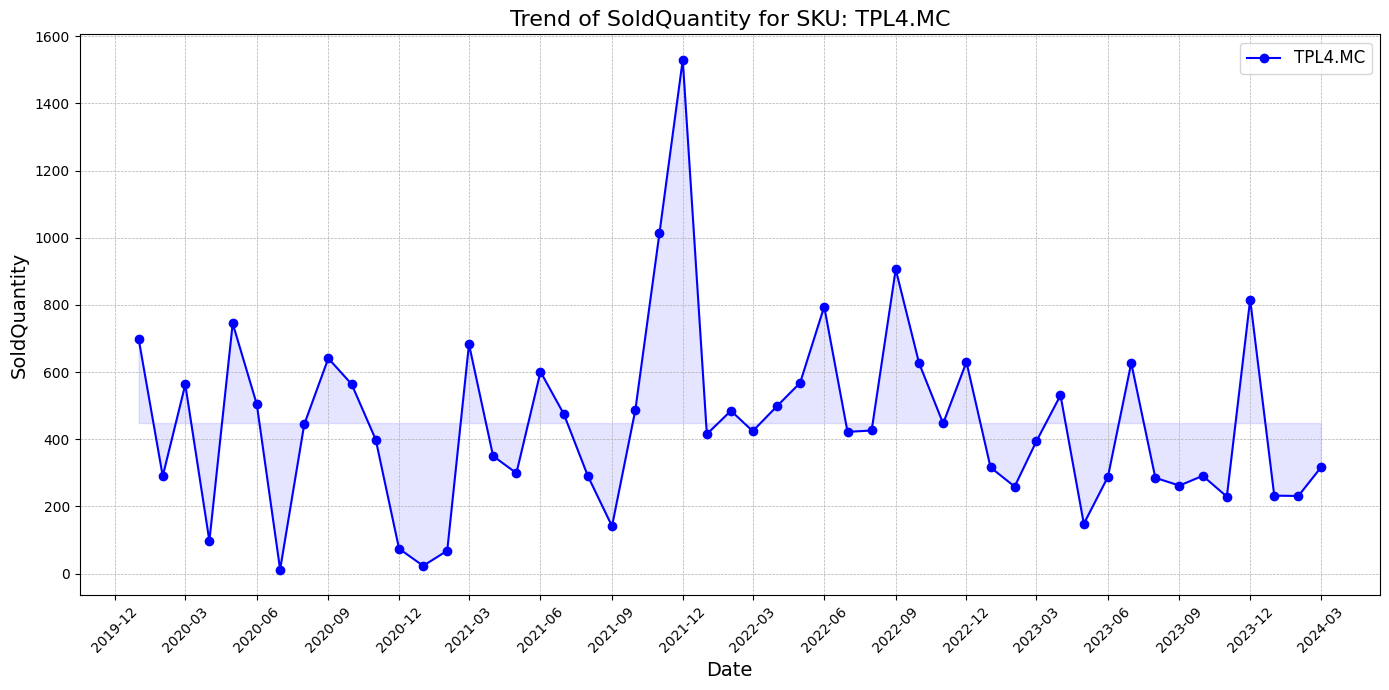

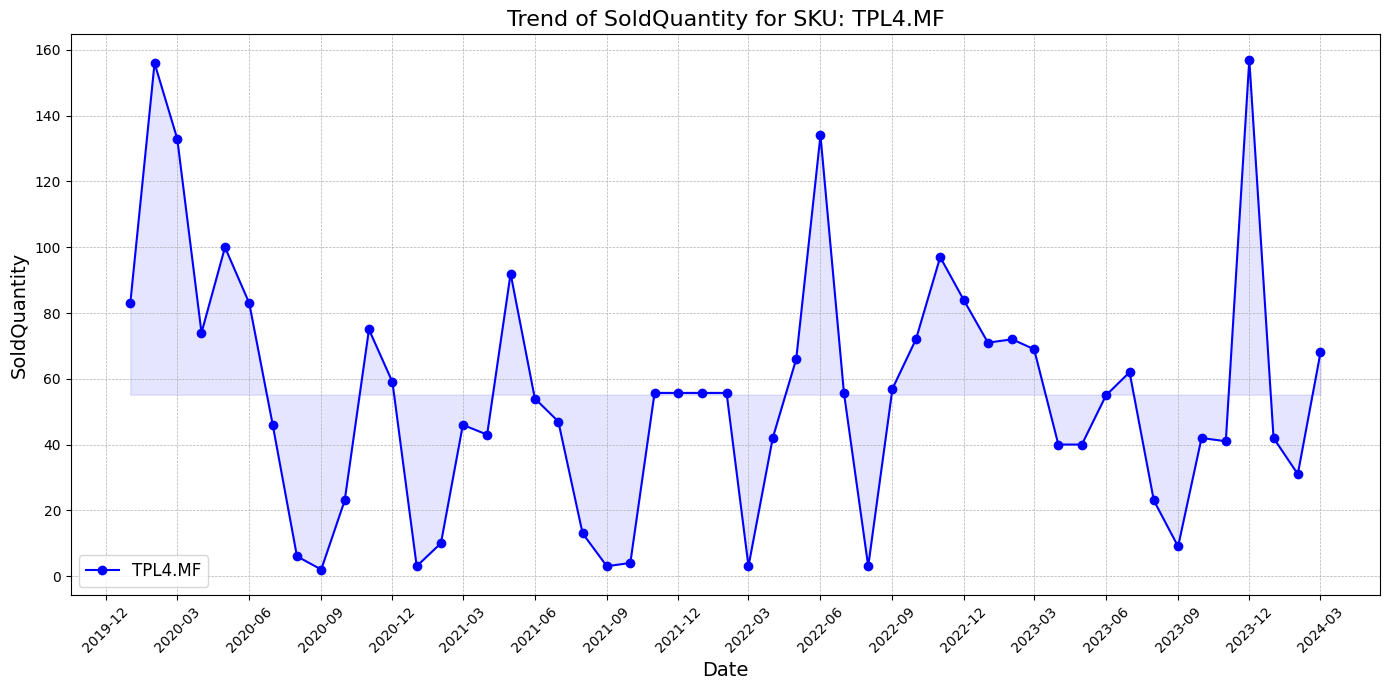

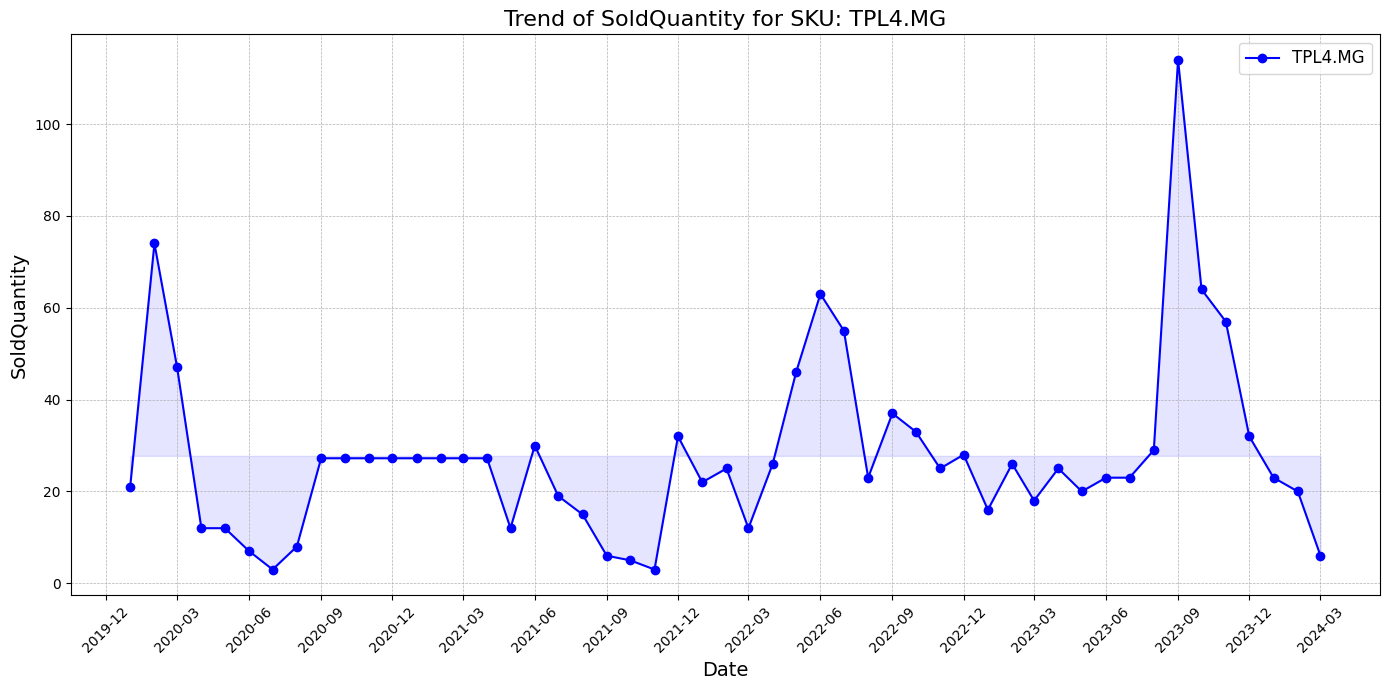

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np 

for sku, merged_df in zip(sku_list, merged_dfs):
    plt.figure(figsize=(14, 7))
    date_labels = pd.to_datetime(merged_df['Year'].astype(str) + '-' + merged_df['Month'].astype(str).str.zfill(2) + '-01')
    
    mean_sold_quantity = merged_df['SoldQuantity'].mean()  # Recalculate mean_sold_quantity for each SKU
    
    plt.plot(date_labels, merged_df['SoldQuantity'], marker='o', linestyle='-', color='b', label=sku)
    plt.fill_between(date_labels, merged_df['SoldQuantity'], mean_sold_quantity, color='b', alpha=0.1)
    
    plt.title(f'Trend of SoldQuantity for SKU: {sku}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('SoldQuantity', fontsize=14)
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.xticks(rotation=45)
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    plt.show()


CHECK OUTLIER FUNCTIONS

In [23]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound), lower_bound, upper_bound

CHECK OUTLIERS

Data for SKU: TPL4.MC
    Year  Month      SKU  SoldQuantity
0   2020      1  TPL4.MC         699.0
1   2020      2  TPL4.MC         290.0
2   2020      3  TPL4.MC         563.0
3   2020      4  TPL4.MC          97.0
4   2020      5  TPL4.MC         745.0
5   2020      6  TPL4.MC         504.0
6   2020      7  TPL4.MC          12.0
7   2020      8  TPL4.MC         444.0
8   2020      9  TPL4.MC         641.0
9   2020     10  TPL4.MC         564.0
10  2020     11  TPL4.MC         399.0
11  2020     12  TPL4.MC          74.0
12  2021      1  TPL4.MC          23.0
13  2021      2  TPL4.MC          68.0
14  2021      3  TPL4.MC         683.0
15  2021      4  TPL4.MC         350.0
16  2021      5  TPL4.MC         299.0
17  2021      6  TPL4.MC         601.0
18  2021      7  TPL4.MC         475.0
19  2021      8  TPL4.MC         290.0
20  2021      9  TPL4.MC         141.0
21  2021     10  TPL4.MC         487.0
22  2021     11  TPL4.MC        1013.0
23  2021     12  TPL4.MC        1530.0
24 

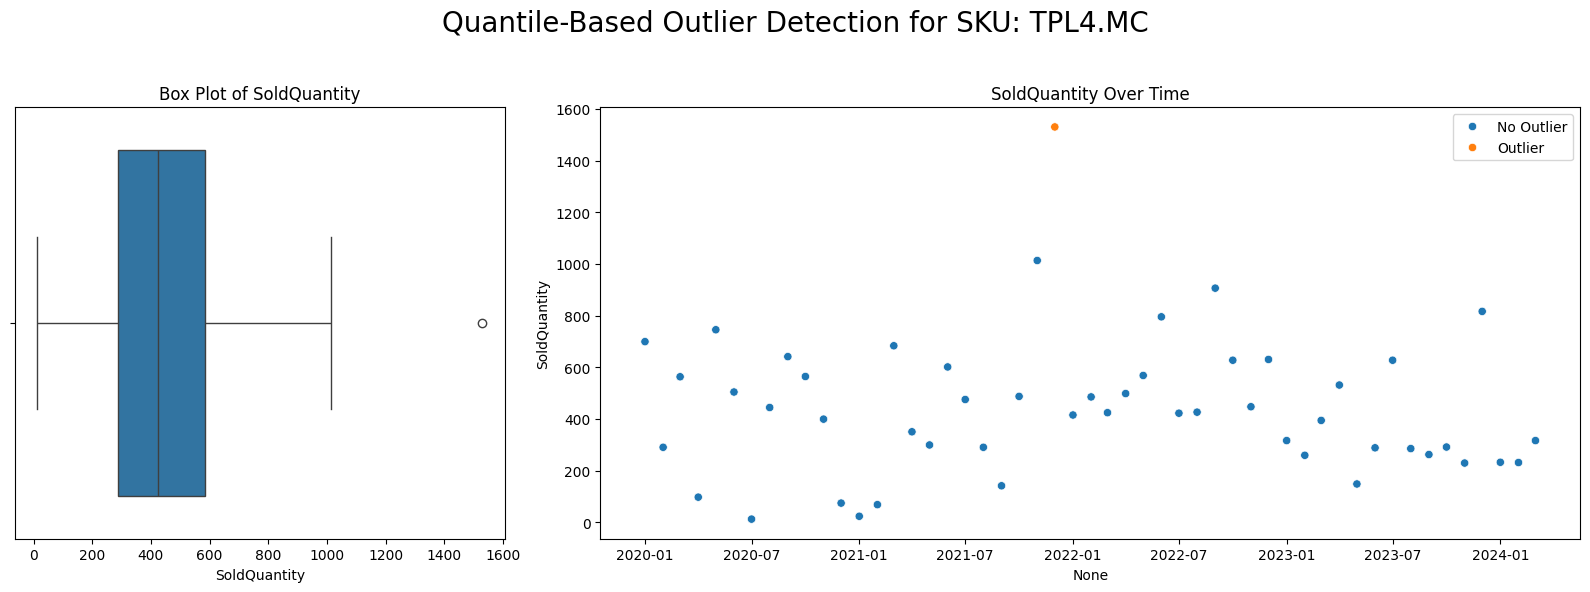

Data for SKU: TPL4.MF
    Year  Month      SKU  SoldQuantity
0   2020      1  TPL4.MF     83.000000
1   2020      2  TPL4.MF    156.000000
2   2020      3  TPL4.MF    133.000000
3   2020      4  TPL4.MF     74.000000
4   2020      5  TPL4.MF    100.000000
5   2020      6  TPL4.MF     83.000000
6   2020      7  TPL4.MF     46.000000
7   2020      8  TPL4.MF      6.000000
8   2020      9  TPL4.MF      2.000000
9   2020     10  TPL4.MF     23.000000
10  2020     11  TPL4.MF     75.000000
11  2020     12  TPL4.MF     59.000000
12  2021      1  TPL4.MF      3.000000
13  2021      2  TPL4.MF     10.000000
14  2021      3  TPL4.MF     46.000000
15  2021      4  TPL4.MF     43.000000
16  2021      5  TPL4.MF     92.000000
17  2021      6  TPL4.MF     54.000000
18  2021      7  TPL4.MF     47.000000
19  2021      8  TPL4.MF     13.000000
20  2021      9  TPL4.MF      3.000000
21  2021     10  TPL4.MF      4.000000
22  2021     11  TPL4.MF     55.702128
23  2021     12  TPL4.MF     55.702128
24 

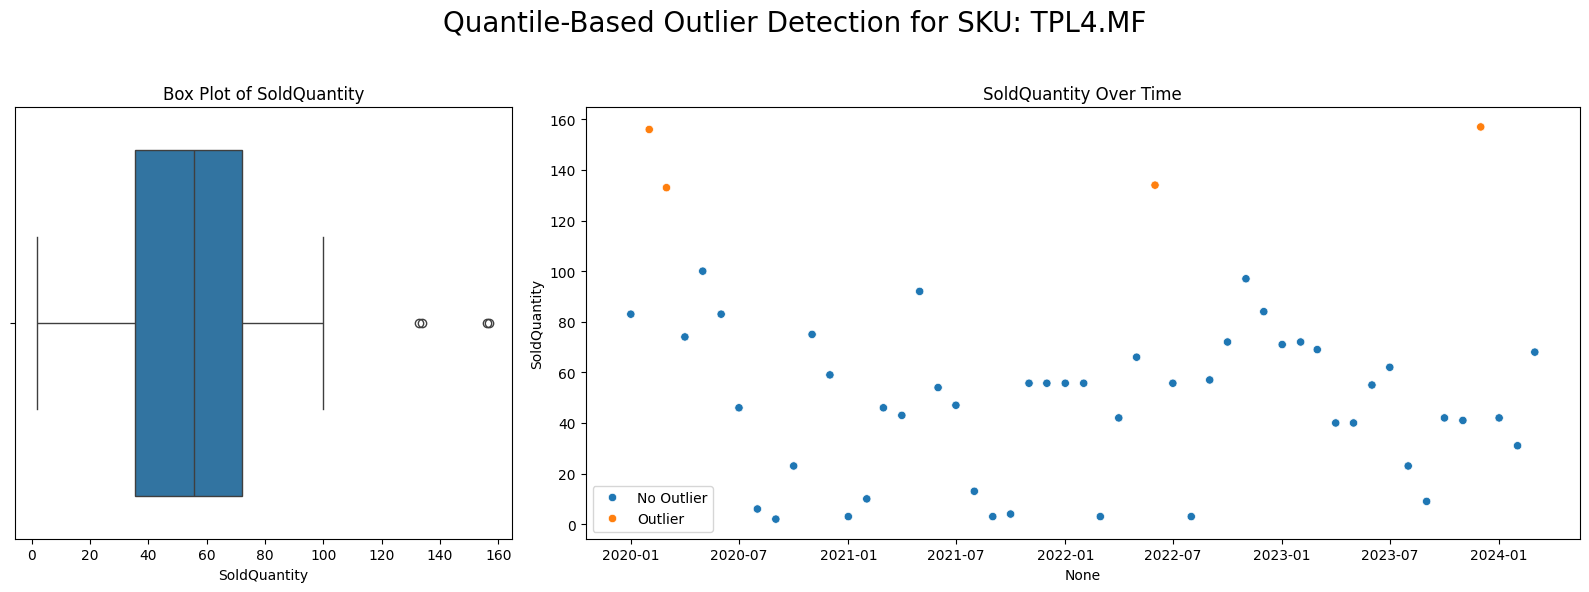

Data for SKU: TPL4.MG
    Year  Month      SKU  SoldQuantity
0   2020      1  TPL4.MG     21.000000
1   2020      2  TPL4.MG     74.000000
2   2020      3  TPL4.MG     47.000000
3   2020      4  TPL4.MG     12.000000
4   2020      5  TPL4.MG     12.000000
5   2020      6  TPL4.MG      7.000000
6   2020      7  TPL4.MG      3.000000
7   2020      8  TPL4.MG      8.000000
8   2020      9  TPL4.MG     27.227273
9   2020     10  TPL4.MG     27.227273
10  2020     11  TPL4.MG     27.227273
11  2020     12  TPL4.MG     27.227273
12  2021      1  TPL4.MG     27.227273
13  2021      2  TPL4.MG     27.227273
14  2021      3  TPL4.MG     27.227273
15  2021      4  TPL4.MG     27.227273
16  2021      5  TPL4.MG     12.000000
17  2021      6  TPL4.MG     30.000000
18  2021      7  TPL4.MG     19.000000
19  2021      8  TPL4.MG     15.000000
20  2021      9  TPL4.MG      6.000000
21  2021     10  TPL4.MG      5.000000
22  2021     11  TPL4.MG      3.000000
23  2021     12  TPL4.MG     32.000000
24 

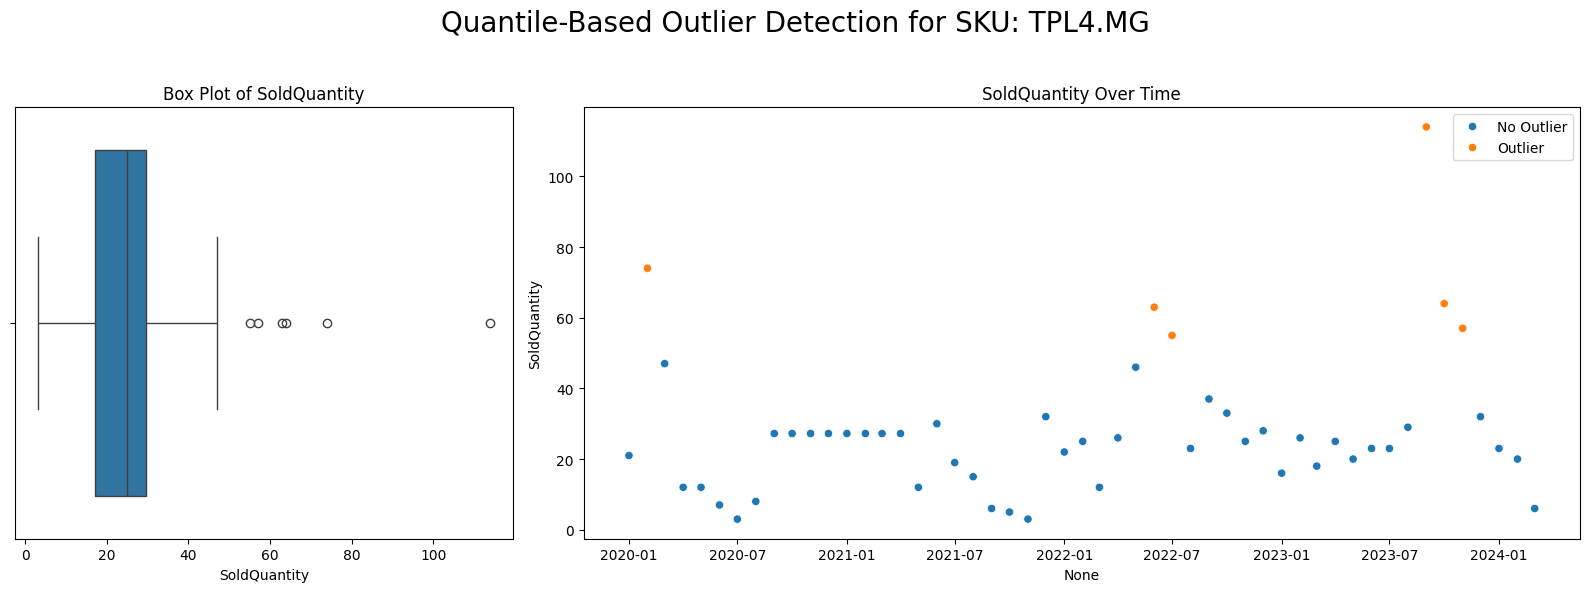

In [24]:
for sku, merged_df in zip(sku_list, merged_dfs):
    print(f'Data for SKU: {sku}')
    print(merged_df)
    print('\n')

    outliers, lower_bound, upper_bound = detect_outliers(merged_df['SoldQuantity'])
    outlier_data = merged_df[outliers]
    
    if not outlier_data.empty:
        print(f'Outliers for SKU: {sku}')
        print(outlier_data)
    else:
        print(f'No outliers detected for SKU: {sku}')
    print('\n')
    
    # Create a mask for outliers and non-outliers
    mask = ~outliers
    
    # Create a plot with a box plot and a scatter plot for outliers and non-outliers
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 2]})
    fig.suptitle(f'Quantile-Based Outlier Detection for SKU: {sku}', size=20)
    
    sns.boxplot(x='SoldQuantity', data=merged_df, ax=ax1)
    ax1.set_title('Box Plot of SoldQuantity')
    
    date_labels = pd.to_datetime(merged_df['Year'].astype(str) + '-' + merged_df['Month'].astype(str).str.zfill(2) + '-01')
    sns.scatterplot(data=merged_df, x=date_labels, y='SoldQuantity', hue=np.where(mask, 'No Outlier', 'Outlier'), ax=ax2)
    ax2.set_title('SoldQuantity Over Time')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

IMPORTING VALUE OUTLIERS 

Data for SKU: TPL4.MC
    Year  Month      SKU  SoldQuantity
0   2020      1  TPL4.MC         699.0
1   2020      2  TPL4.MC         290.0
2   2020      3  TPL4.MC         563.0
3   2020      4  TPL4.MC          97.0
4   2020      5  TPL4.MC         745.0
5   2020      6  TPL4.MC         504.0
6   2020      7  TPL4.MC          12.0
7   2020      8  TPL4.MC         444.0
8   2020      9  TPL4.MC         641.0
9   2020     10  TPL4.MC         564.0
10  2020     11  TPL4.MC         399.0
11  2020     12  TPL4.MC          74.0
12  2021      1  TPL4.MC          23.0
13  2021      2  TPL4.MC          68.0
14  2021      3  TPL4.MC         683.0
15  2021      4  TPL4.MC         350.0
16  2021      5  TPL4.MC         299.0
17  2021      6  TPL4.MC         601.0
18  2021      7  TPL4.MC         475.0
19  2021      8  TPL4.MC         290.0
20  2021      9  TPL4.MC         141.0
21  2021     10  TPL4.MC         487.0
22  2021     11  TPL4.MC        1013.0
23  2021     12  TPL4.MC        1530.0
24 

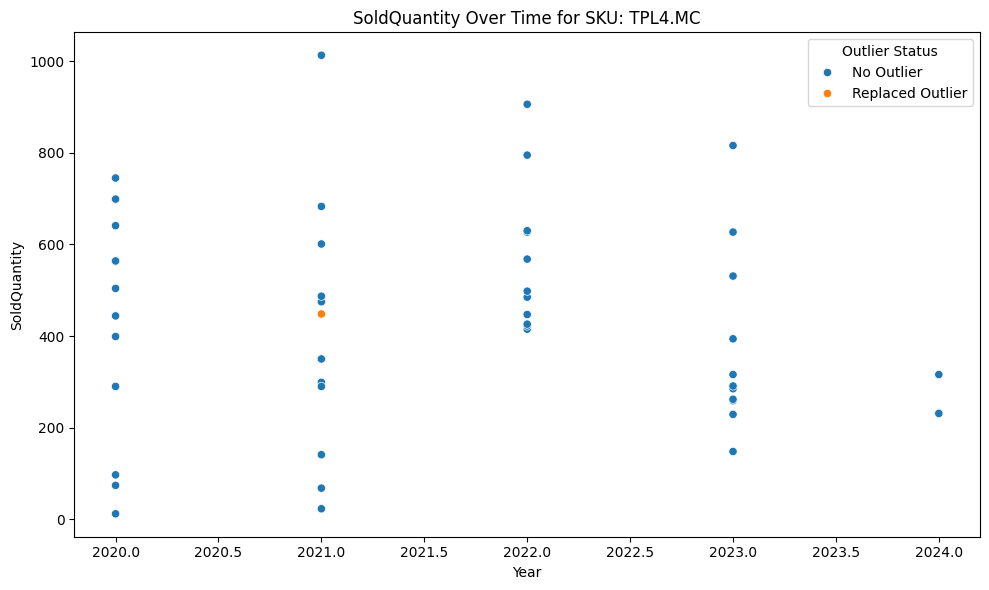

Data for SKU: TPL4.MF
    Year  Month      SKU  SoldQuantity
0   2020      1  TPL4.MF     83.000000
1   2020      2  TPL4.MF    156.000000
2   2020      3  TPL4.MF    133.000000
3   2020      4  TPL4.MF     74.000000
4   2020      5  TPL4.MF    100.000000
5   2020      6  TPL4.MF     83.000000
6   2020      7  TPL4.MF     46.000000
7   2020      8  TPL4.MF      6.000000
8   2020      9  TPL4.MF      2.000000
9   2020     10  TPL4.MF     23.000000
10  2020     11  TPL4.MF     75.000000
11  2020     12  TPL4.MF     59.000000
12  2021      1  TPL4.MF      3.000000
13  2021      2  TPL4.MF     10.000000
14  2021      3  TPL4.MF     46.000000
15  2021      4  TPL4.MF     43.000000
16  2021      5  TPL4.MF     92.000000
17  2021      6  TPL4.MF     54.000000
18  2021      7  TPL4.MF     47.000000
19  2021      8  TPL4.MF     13.000000
20  2021      9  TPL4.MF      3.000000
21  2021     10  TPL4.MF      4.000000
22  2021     11  TPL4.MF     55.702128
23  2021     12  TPL4.MF     55.702128
24 

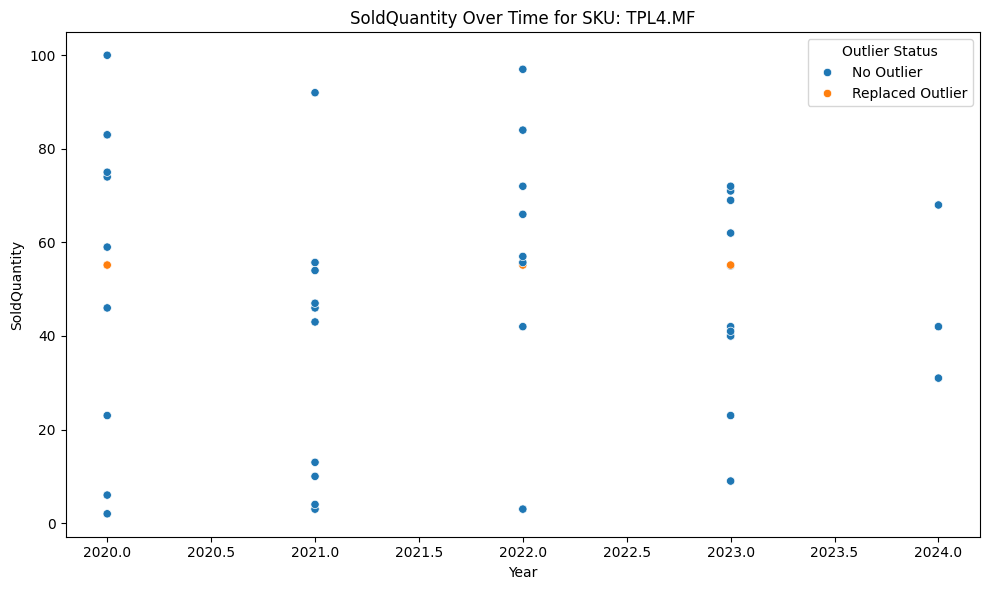

Data for SKU: TPL4.MG
    Year  Month      SKU  SoldQuantity
0   2020      1  TPL4.MG     21.000000
1   2020      2  TPL4.MG     74.000000
2   2020      3  TPL4.MG     47.000000
3   2020      4  TPL4.MG     12.000000
4   2020      5  TPL4.MG     12.000000
5   2020      6  TPL4.MG      7.000000
6   2020      7  TPL4.MG      3.000000
7   2020      8  TPL4.MG      8.000000
8   2020      9  TPL4.MG     27.227273
9   2020     10  TPL4.MG     27.227273
10  2020     11  TPL4.MG     27.227273
11  2020     12  TPL4.MG     27.227273
12  2021      1  TPL4.MG     27.227273
13  2021      2  TPL4.MG     27.227273
14  2021      3  TPL4.MG     27.227273
15  2021      4  TPL4.MG     27.227273
16  2021      5  TPL4.MG     12.000000
17  2021      6  TPL4.MG     30.000000
18  2021      7  TPL4.MG     19.000000
19  2021      8  TPL4.MG     15.000000
20  2021      9  TPL4.MG      6.000000
21  2021     10  TPL4.MG      5.000000
22  2021     11  TPL4.MG      3.000000
23  2021     12  TPL4.MG     32.000000
24 

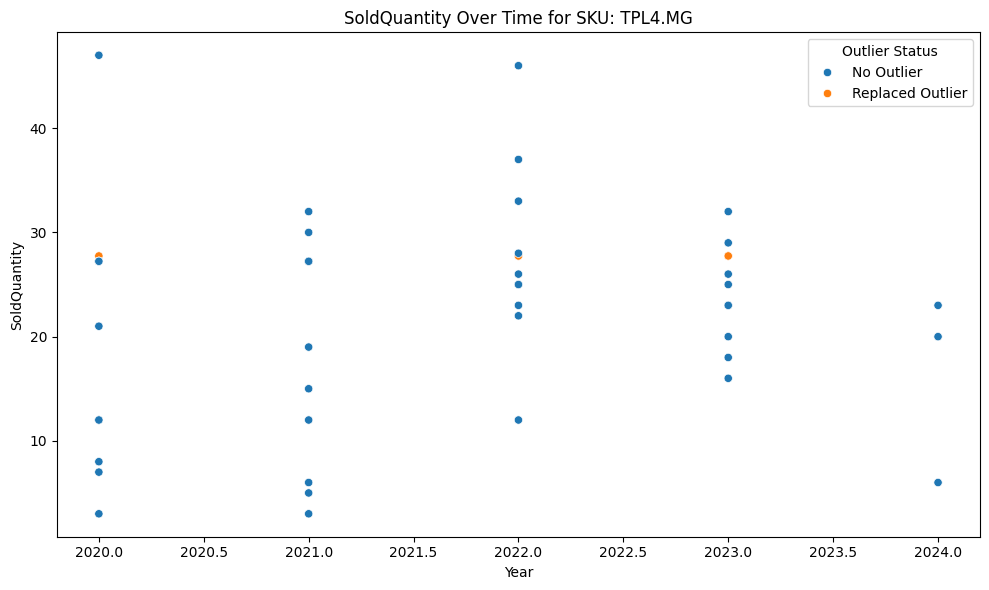

In [25]:

processed_dfs = []

for sku, merged_df in zip(sku_list, merged_dfs):
    print(f'Data for SKU: {sku}')
    print(merged_df)
    print('\n')

    mean_sold_quantity = merged_df['SoldQuantity'].mean()
    merged_df['SoldQuantity'].fillna(mean_sold_quantity, inplace=True)
    
    # Detect outliers
    outliers, lower_bound, upper_bound = detect_outliers(merged_df['SoldQuantity'])
    outlier_data = merged_df[outliers]
    merged_df.loc[outliers, 'SoldQuantity'] = mean_sold_quantity
    
    print(f'Data for SKU: {sku} (after replacing outliers)')
    print(merged_df)
    print('\n')

    if not outlier_data.empty:
        print(f'Outliers for SKU: {sku} (before replacement)')
        print(outlier_data)
    else:
        print(f'No outliers detected for SKU: {sku}')
    print('\n')
    
    # Append the processed DataFrame to the list
    processed_dfs.append((sku, merged_df.copy()))
    
    # Visualization
    plt.figure(figsize=(10, 6))
    mask = ~outliers

    sns.scatterplot(data=merged_df, x='Year', y='SoldQuantity', hue=np.where(mask, 'No Outlier', 'Replaced Outlier'))
    plt.title(f'SoldQuantity Over Time for SKU: {sku}')
    plt.xlabel('Year')
    plt.ylabel('SoldQuantity')
    plt.legend(title='Outlier Status', loc='upper right')

    plt.tight_layout()
    plt.show()

SAVE DATA NON OUTLIERS

In [26]:
for sku, processed_df in processed_dfs:
    table_name = f'merged_dfnanvalue_{sku}'
    processed_df.to_sql(table_name, engine, if_exists='replace', index=False)
    print(f"Table {table_name} created successfully.")
    print(processed_df.head())


Table merged_dfnanvalue_TPL4.MC created successfully.
   Year  Month      SKU  SoldQuantity
0  2020      1  TPL4.MC         699.0
1  2020      2  TPL4.MC         290.0
2  2020      3  TPL4.MC         563.0
3  2020      4  TPL4.MC          97.0
4  2020      5  TPL4.MC         745.0
Table merged_dfnanvalue_TPL4.MF created successfully.
   Year  Month      SKU  SoldQuantity
0  2020      1  TPL4.MF     83.000000
1  2020      2  TPL4.MF     55.166875
2  2020      3  TPL4.MF     55.166875
3  2020      4  TPL4.MF     74.000000
4  2020      5  TPL4.MF    100.000000
Table merged_dfnanvalue_TPL4.MG created successfully.
   Year  Month      SKU  SoldQuantity
0  2020      1  TPL4.MG     21.000000
1  2020      2  TPL4.MG     27.741533
2  2020      3  TPL4.MG     47.000000
3  2020      4  TPL4.MG     12.000000
4  2020      5  TPL4.MG     12.000000


CHECK ADF VALUE 

In [27]:
from statsmodels.tsa.stattools import adfuller


adf_results = []

for sku, processed_df in processed_dfs:
    adf_result = adfuller(processed_df['SoldQuantity'])
    adf_results.append((sku, adf_result))
    print(f'ADF Statistic for SKU {sku}: {adf_result[0]}')
    print(f'p-value for SKU {sku}: {adf_result[1]}')
    print(f'Critical Values for SKU {sku}:')
    for key, value in adf_result[4].items():
        print(f'    {key}: {value}')
    print('\n')

ADF Statistic for SKU TPL4.MC: -6.618719834537984
p-value for SKU TPL4.MC: 6.1134606364729545e-09
Critical Values for SKU TPL4.MC:
    1%: -3.568485864
    5%: -2.92135992
    10%: -2.5986616


ADF Statistic for SKU TPL4.MF: -4.343110215838117
p-value for SKU TPL4.MF: 0.0003737494964739214
Critical Values for SKU TPL4.MF:
    1%: -3.568485864
    5%: -2.92135992
    10%: -2.5986616


ADF Statistic for SKU TPL4.MG: -4.5065719101183
p-value for SKU TPL4.MG: 0.0001913325665153375
Critical Values for SKU TPL4.MG:
    1%: -3.568485864
    5%: -2.92135992
    10%: -2.5986616




SUMMARY STATIONARY

In [28]:
for sku, processed_df in processed_dfs:
    
    if adf_result[1] < 0.05:
        print(f'The time series for SKU {sku} is stationary.')
    else:
        print(f'The time series for SKU {sku} is not stationary.')
    print('\n')

The time series for SKU TPL4.MC is stationary.


The time series for SKU TPL4.MF is stationary.


The time series for SKU TPL4.MG is stationary.




FORECAST in EVERY SKU 


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mape, mse, rmse


70%

Processing data for SKU: TPL4.MC
ARIMA(9, 0, 8) - Exception: LU decomposition error.


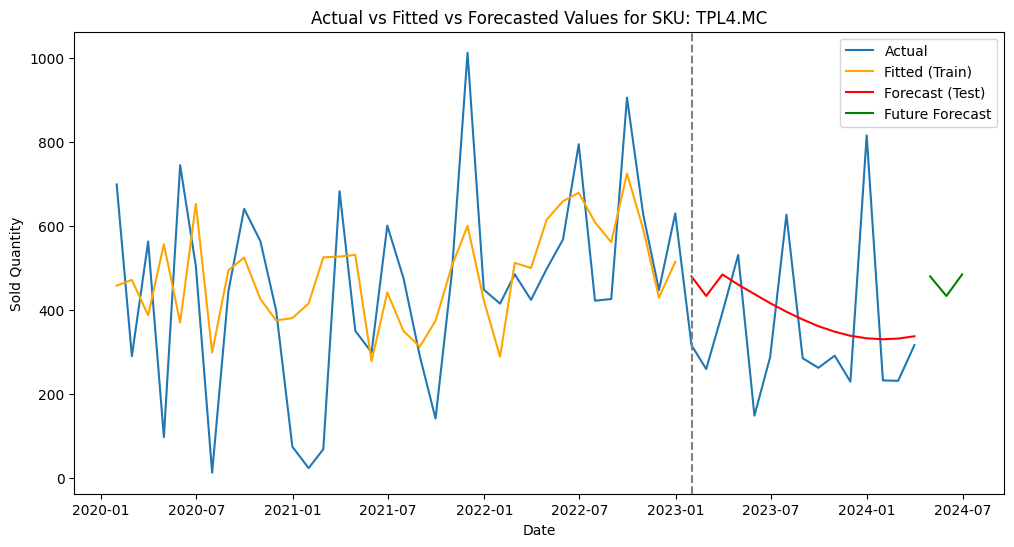

Best model order for SKU TPL4.MC: (2, 0, 5)
Test Set Metrics:
  MAE: 147.3544436626934
  MAPE: 48.14%
  MSE: 34138.57503968164
  RMSE: 184.76627138003744
Actual vs Forecasted values for training set of SKU TPL4.MC:
                 Actual  Forecasted
Date                               
2020-01-31   699.000000  457.804749
2020-02-29   290.000000  471.439993
2020-03-31   563.000000  387.234439
2020-04-30    97.000000  556.518412
2020-05-31   745.000000  369.849393
2020-06-30   504.000000  652.751561
2020-07-31    12.000000  298.438051
2020-08-31   444.000000  494.368089
2020-09-30   641.000000  524.824502
2020-10-31   564.000000  425.918377
2020-11-30   399.000000  375.049383
2020-12-31    74.000000  380.366483
2021-01-31    23.000000  415.433605
2021-02-28    68.000000  525.332253
2021-03-31   683.000000  527.273799
2021-04-30   350.000000  531.190787
2021-05-31   299.000000  277.618338
2021-06-30   601.000000  441.780760
2021-07-31   475.000000  349.480000
2021-08-31   290.000000  312.

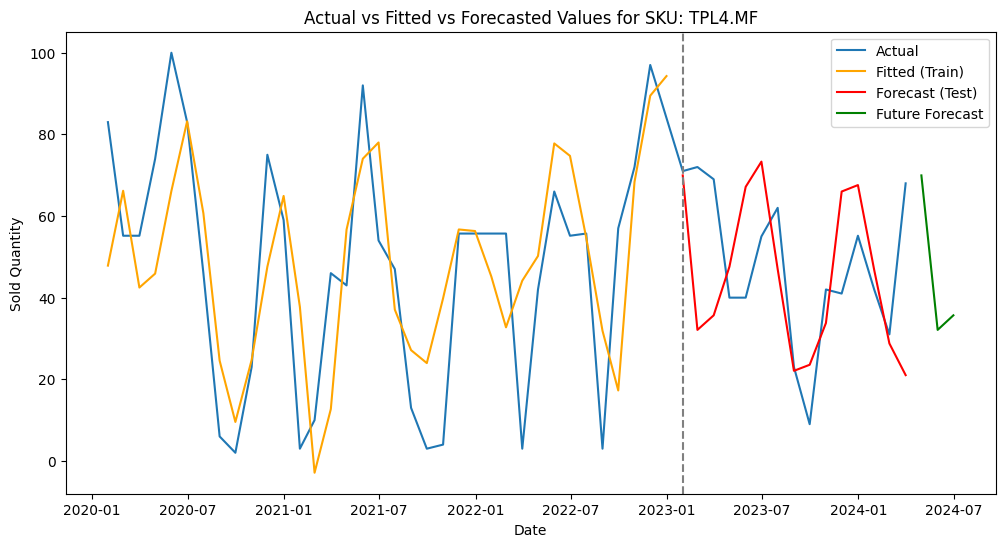

Best model order for SKU TPL4.MF: (7, 0, 8)
Test Set Metrics:
  MAE: 17.164247561955698
  MAPE: 40.40%
  MSE: 490.257095162232
  RMSE: 22.141750047415673
Actual vs Forecasted values for training set of SKU TPL4.MF:
                Actual  Forecasted
Date                              
2020-01-31   83.000000   47.844729
2020-02-29   55.166875   66.186907
2020-03-31   55.166875   42.472819
2020-04-30   74.000000   45.887209
2020-05-31  100.000000   66.125256
2020-06-30   83.000000   83.208646
2020-07-31   46.000000   60.677992
2020-08-31    6.000000   24.560276
2020-09-30    2.000000    9.551411
2020-10-31   23.000000   24.725053
2020-11-30   75.000000   47.571493
2020-12-31   59.000000   64.918068
2021-01-31    3.000000   37.737280
2021-02-28   10.000000   -2.886995
2021-03-31   46.000000   12.706492
2021-04-30   43.000000   56.687478
2021-05-31   92.000000   74.031604
2021-06-30   54.000000   78.015702
2021-07-31   47.000000   37.071260
2021-08-31   13.000000   27.140886
2021-09-30    3

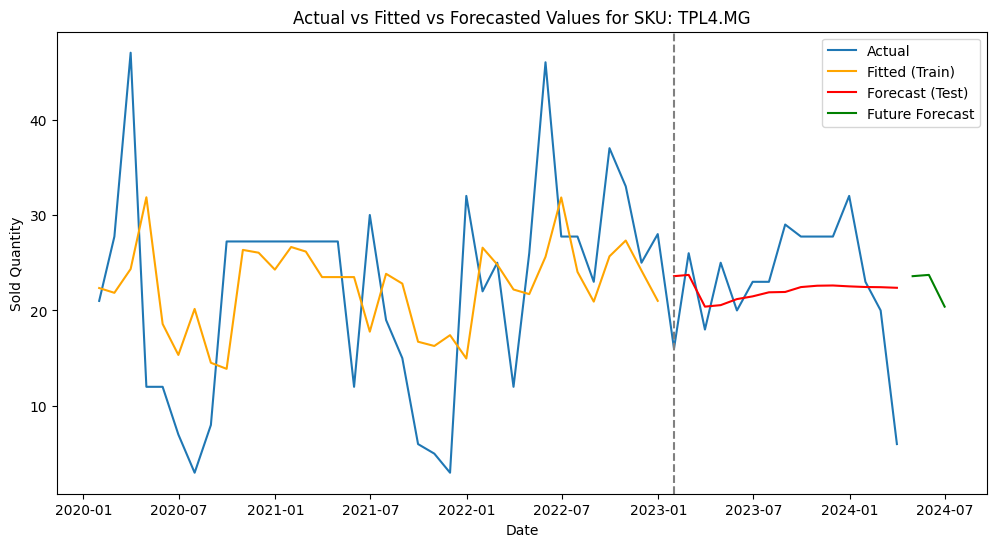

Best model order for SKU TPL4.MG: (6, 0, 0)
Test Set Metrics:
  MAE: 4.799150985534731
  MAPE: 33.48%
  MSE: 39.20642250162561
  RMSE: 6.261503214215066
Actual vs Forecasted values for training set of SKU TPL4.MG:
               Actual  Forecasted
Date                             
2020-01-31  21.000000   22.347795
2020-02-29  27.741533   21.847219
2020-03-31  47.000000   24.342475
2020-04-30  12.000000   31.858121
2020-05-31  12.000000   18.584937
2020-06-30   7.000000   15.338457
2020-07-31   3.000000   20.161296
2020-08-31   8.000000   14.518821
2020-09-30  27.227273   13.883005
2020-10-31  27.227273   26.342413
2020-11-30  27.227273   26.049342
2020-12-31  27.227273   24.277218
2021-01-31  27.227273   26.645596
2021-02-28  27.227273   26.169335
2021-03-31  27.227273   23.494086
2021-04-30  27.227273   23.494086
2021-05-31  12.000000   23.494086
2021-06-30  30.000000   17.777038
2021-07-31  19.000000   23.840082
2021-08-31  15.000000   22.811382
2021-09-30   6.000000   16.723057
2021

In [30]:
import math
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def calculate_error_metrics(actual, forecasted):
    mae = np.mean(np.abs(actual - forecasted))
    mape = np.mean(np.abs((actual - forecasted) / actual)) * 100
    mse = np.mean((actual - forecasted) ** 2)
    rmse = np.sqrt(mse)
    return mae, mape, mse, rmse

best_models = []

for sku, processed_df in processed_dfs:
    print(f'Processing data for SKU: {sku}')
    
  
    processed_df['Date'] = pd.to_datetime(processed_df[['Year', 'Month']].assign(DAY=1))
    processed_df.set_index('Date', inplace=True)
    
    # Resample SoldQuantity monthly and sum
    df = processed_df['SoldQuantity'].resample('M').sum()

    train_size = math.ceil(len(df) * 0.70)
    train = df[:train_size]
    test = df[train_size:]

    best_mape = np.inf
    best_order = None
    best_model = None

    for p in range(0, 10):
        for q in range(0, 10):
            try:
                model = ARIMA(train, order=(p, 0, q))
                results = model.fit()
                y_pred_test = results.predict(start=test.index[0], end=test.index[-1])
                _, mape, _, _ = calculate_error_metrics(test, y_pred_test)
                if mape < best_mape:
                    best_mape = mape
                    best_model = results
                    best_order = (p, 0, q)
               # print(f"ARIMA({p}, 0, {q}) - MAPE: {mape:.2f}%")
            except Exception as e:
                print(f"ARIMA({p}, 0, {q}) - Exception: {e}")
                continue

    if best_model is not None:
        y_true_train = train.values
        y_pred_train = best_model.predict(start=train.index[0], end=train.index[-1])
        y_true_test = test.values
        y_pred_test = best_model.predict(start=test.index[0], end=test.index[-1])

        mae_test, mape_test, mse_test, rmse_test = calculate_error_metrics(y_true_test, y_pred_test)

        # Forecast the next three months
        forecast_steps = 3
        y_forecast = best_model.forecast(steps=forecast_steps)
        forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

      
        plt.figure(figsize=(12, 6))
        plt.plot(df, label='Actual')
        plt.plot(y_pred_train, label='Fitted (Train)', color='orange')
        plt.plot(y_pred_test, label='Forecast (Test)', color='red')
        plt.plot(forecast_index, y_forecast, label='Future Forecast', color='green')
        plt.axvline(x=test.index[0], color='gray', linestyle='--')
        plt.legend()
        plt.title(f'Actual vs Fitted vs Forecasted Values for SKU: {sku}')
        plt.xlabel('Date')
        plt.ylabel('Sold Quantity')
        plt.show()

        print(f"Best model order for SKU {sku}: {best_order}")

        print(f"Test Set Metrics:")
        print(f"  MAE: {mae_test}")
        print(f"  MAPE: {mape_test:.2f}%")
        print(f"  MSE: {mse_test}")
        print(f"  RMSE: {rmse_test}")

        print(f"Actual vs Forecasted values for training set of SKU {sku}:")
        train_forecast_df = pd.DataFrame({'Actual': y_true_train, 'Forecasted': y_pred_train}, index=train.index)
        print(train_forecast_df)
        
        print(f"Actual vs Forecasted values for test set of SKU {sku}:")
        test_forecast_df = pd.DataFrame({'Actual': y_true_test, 'Forecasted': y_pred_test}, index=test.index)
        print(test_forecast_df)

        print(f"Future Forecast for the next 3 months for SKU {sku}:")
        print(y_forecast)

        best_models.append((sku, best_model, best_order, mae_test, mape_test, mse_test, rmse_test, train_forecast_df, test_forecast_df, y_forecast))
        
        


    else:
        print(f"No suitable model found for SKU {sku}.")


80%

Processing data for SKU: TPL4.MC


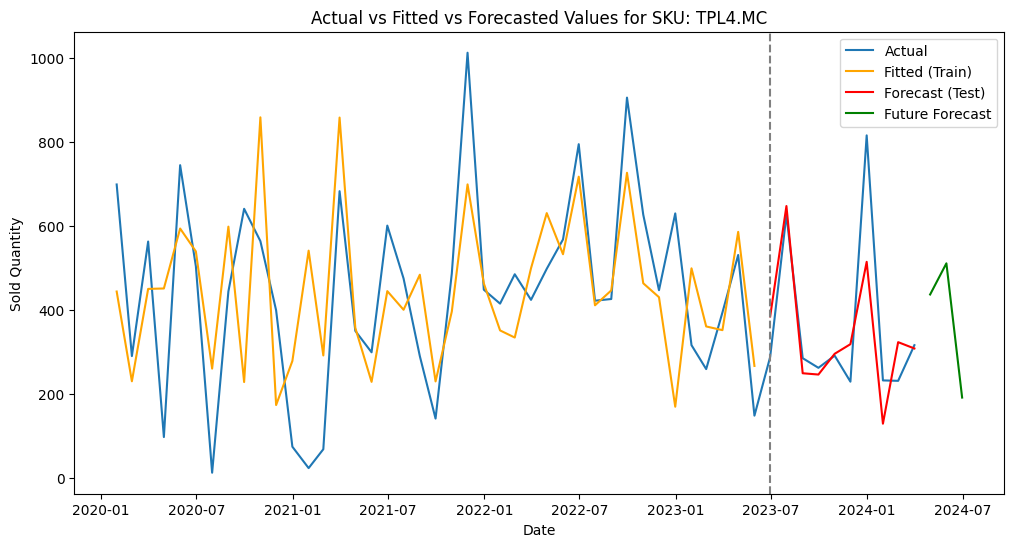

Best model order for SKU TPL4.MC: (7, 0, 9)
Test Set Metrics:
  MAE: 76.75953270524658
  MAPE: 21.99%
  MSE: 12933.743896133672
  RMSE: 113.7266191185409
Actual vs Forecasted values for training set of SKU TPL4.MC:
                 Actual  Forecasted
Date                               
2020-01-31   699.000000  443.864939
2020-02-29   290.000000  229.874706
2020-03-31   563.000000  450.102906
2020-04-30    97.000000  451.127904
2020-05-31   745.000000  594.012079
2020-06-30   504.000000  539.447659
2020-07-31    12.000000  260.144986
2020-08-31   444.000000  598.499287
2020-09-30   641.000000  228.117145
2020-10-31   564.000000  859.019337
2020-11-30   399.000000  173.275681
2020-12-31    74.000000  278.307466
2021-01-31    23.000000  541.257554
2021-02-28    68.000000  291.484958
2021-03-31   683.000000  858.482233
2021-04-30   350.000000  357.012098
2021-05-31   299.000000  228.527022
2021-06-30   601.000000  444.797071
2021-07-31   475.000000  400.391717
2021-08-31   290.000000  483.

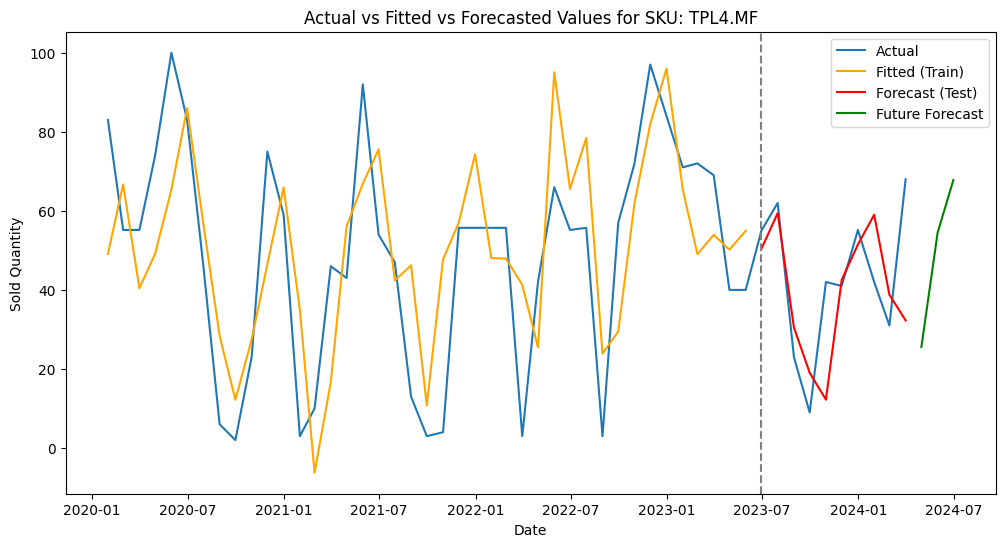

Best model order for SKU TPL4.MF: (9, 0, 9)
Test Set Metrics:
  MAE: 12.020473342658885
  MAPE: 35.60%
  MSE: 271.3600104169802
  RMSE: 16.473008541762496
Actual vs Forecasted values for training set of SKU TPL4.MF:
                Actual  Forecasted
Date                              
2020-01-31   83.000000   49.103761
2020-02-29   55.166875   66.685582
2020-03-31   55.166875   40.397332
2020-04-30   74.000000   49.154762
2020-05-31  100.000000   65.347125
2020-06-30   83.000000   86.002157
2020-07-31   46.000000   56.718590
2020-08-31    6.000000   28.377299
2020-09-30    2.000000   12.209706
2020-10-31   23.000000   27.426980
2020-11-30   75.000000   46.479333
2020-12-31   59.000000   65.934458
2021-01-31    3.000000   34.914289
2021-02-28   10.000000   -6.248901
2021-03-31   46.000000   16.759910
2021-04-30   43.000000   56.019436
2021-05-31   92.000000   66.881832
2021-06-30   54.000000   75.504350
2021-07-31   47.000000   42.379154
2021-08-31   13.000000   46.210418
2021-09-30    

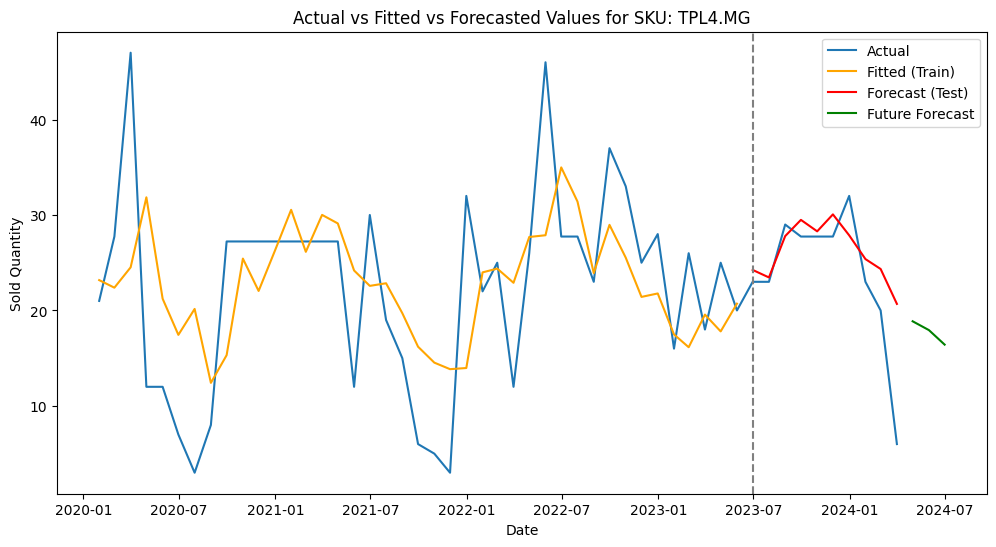

Best model order for SKU TPL4.MG: (4, 0, 5)
Test Set Metrics:
  MAE: 3.306944684549939
  MAPE: 31.80%
  MSE: 26.9224912154966
  RMSE: 5.188688776126065
Actual vs Forecasted values for training set of SKU TPL4.MG:
               Actual  Forecasted
Date                             
2020-01-31  21.000000   23.178426
2020-02-29  27.741533   22.384974
2020-03-31  47.000000   24.518033
2020-04-30  12.000000   31.853119
2020-05-31  12.000000   21.228756
2020-06-30   7.000000   17.441475
2020-07-31   3.000000   20.158954
2020-08-31   8.000000   12.415012
2020-09-30  27.227273   15.313933
2020-10-31  27.227273   25.432831
2020-11-30  27.227273   22.042530
2020-12-31  27.227273   26.248167
2021-01-31  27.227273   30.542544
2021-02-28  27.227273   26.141150
2021-03-31  27.227273   30.011686
2021-04-30  27.227273   29.115647
2021-05-31  12.000000   24.187462
2021-06-30  30.000000   22.574470
2021-07-31  19.000000   22.847971
2021-08-31  15.000000   19.713247
2021-09-30   6.000000   16.201425
2021-

In [31]:
import math
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def calculate_error_metrics(actual, forecasted):
    mae = np.mean(np.abs(actual - forecasted))
    mape = np.mean(np.abs((actual - forecasted) / actual)) * 100
    mse = np.mean((actual - forecasted) ** 2)
    rmse = np.sqrt(mse)
    return mae, mape, mse, rmse

best_models80 = []

for sku, processed_df in processed_dfs:
    print(f'Processing data for SKU: {sku}')
    
    processed_df['Date'] = pd.to_datetime(processed_df[['Year', 'Month']].assign(DAY=1))
    processed_df.set_index('Date', inplace=True)
    
    # Resample SoldQuantity monthly and sum
    df = processed_df['SoldQuantity'].resample('M').sum()

    train_size = math.ceil(len(df) * 0.80)
    train = df[:train_size]
    test = df[train_size:]

    best_mape = np.inf
    best_order = None
    best_model = None

    for p in range(0, 10):
        for q in range(0, 10):
            try:
                model = ARIMA(train, order=(p, 0, q))
                results = model.fit()
                y_pred_test = results.predict(start=test.index[0], end=test.index[-1])
                _, mape, _, _ = calculate_error_metrics(test, y_pred_test)
                if mape < best_mape:
                    best_mape = mape
                    best_model = results
                    best_order = (p, 0, q)
            except Exception as e:
                print(f"ARIMA({p}, 0, {q}) - Exception: {e}")
                continue

    if best_model is not None:
        y_true_train = train.values
        y_pred_train = best_model.predict(start=train.index[0], end=train.index[-1])
        y_true_test = test.values
        y_pred_test = best_model.predict(start=test.index[0], end=test.index[-1])

        mae_test, mape_test, mse_test, rmse_test = calculate_error_metrics(y_true_test, y_pred_test)

        # Forecast for April 2024 to June 2024
        forecast_steps = 3
        start_date = pd.to_datetime("2024-04-01")
        end_date = pd.to_datetime("2024-06-30")
        y_forecast = best_model.predict(start=start_date, end=end_date)
        forecast_index = pd.date_range(start=start_date, end=end_date, freq='M')

        plt.figure(figsize=(12, 6))
        plt.plot(df, label='Actual')
        plt.plot(y_pred_train, label='Fitted (Train)', color='orange')
        plt.plot(y_pred_test, label='Forecast (Test)', color='red')
        plt.plot(forecast_index, y_forecast, label='Future Forecast', color='green')
        plt.axvline(x=test.index[0], color='gray', linestyle='--')
        plt.legend()
        plt.title(f'Actual vs Fitted vs Forecasted Values for SKU: {sku}')
        plt.xlabel('Date')
        plt.ylabel('Sold Quantity')
        plt.show()

        print(f"Best model order for SKU {sku}: {best_order}")

        print(f"Test Set Metrics:")
        print(f"  MAE: {mae_test}")
        print(f"  MAPE: {mape_test:.2f}%")
        print(f"  MSE: {mse_test}")
        print(f"  RMSE: {rmse_test}")

        print(f"Actual vs Forecasted values for training set of SKU {sku}:")
        train_forecast_df = pd.DataFrame({'Actual': y_true_train, 'Forecasted': y_pred_train}, index=train.index)
        print(train_forecast_df)
        
        print(f"Actual vs Forecasted values for test set of SKU {sku}:")
        test_forecast_df = pd.DataFrame({'Actual': y_true_test, 'Forecasted': y_pred_test}, index=test.index)
        print(test_forecast_df)

        print(f"Future Forecast for April 2024 to June 2024 for SKU {sku}:")
        forecast_df = pd.DataFrame({'Forecasted': y_forecast}, index=forecast_index)
        print(forecast_df)

        best_models80.append((sku, best_model, best_order, mae_test, mape_test, mse_test, rmse_test, train_forecast_df, test_forecast_df, forecast_df))
    else:
        print(f"No suitable model found for SKU {sku}.")


90%

Processing data for SKU: TPL4.MC
ARIMA(6, 0, 3) - Exception: LU decomposition error.
ARIMA(8, 0, 9) - Exception: LU decomposition error.


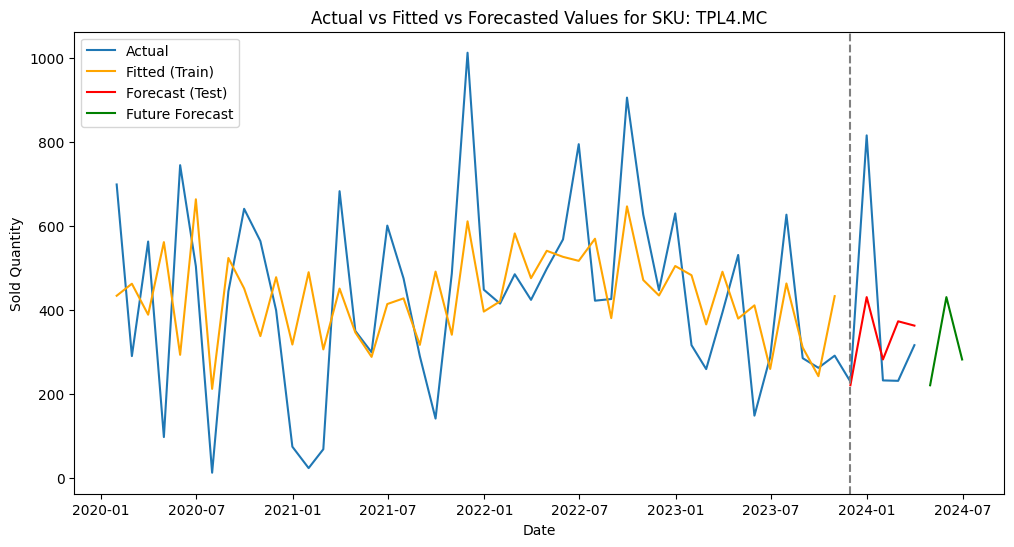

Best model order for SKU TPL4.MC: (5, 0, 4)
Test Set Metrics:
  MAE: 126.47632456819281
  MAPE: 29.73%
  MSE: 34687.9306462868
  RMSE: 186.2469614417556
Actual vs Forecasted values for training set of SKU TPL4.MC:
                 Actual  Forecasted
Date                               
2020-01-31   699.000000  433.802618
2020-02-29   290.000000  462.444514
2020-03-31   563.000000  388.618302
2020-04-30    97.000000  561.642452
2020-05-31   745.000000  293.002243
2020-06-30   504.000000  663.692574
2020-07-31    12.000000  211.834424
2020-08-31   444.000000  523.777688
2020-09-30   641.000000  451.227323
2020-10-31   564.000000  337.581320
2020-11-30   399.000000  477.985261
2020-12-31    74.000000  317.478564
2021-01-31    23.000000  489.915691
2021-02-28    68.000000  305.845840
2021-03-31   683.000000  450.786624
2021-04-30   350.000000  346.382462
2021-05-31   299.000000  288.091761
2021-06-30   601.000000  414.031634
2021-07-31   475.000000  427.543217
2021-08-31   290.000000  316.7

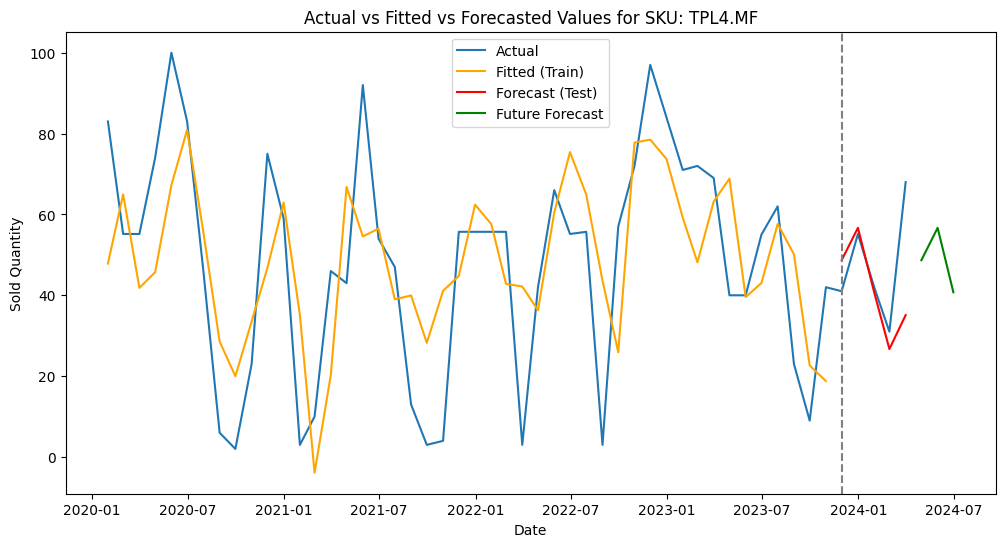

Best model order for SKU TPL4.MF: (8, 0, 4)
Test Set Metrics:
  MAE: 9.531180820727498
  MAPE: 17.34%
  MSE: 232.81876491229792
  RMSE: 15.258399814931378
Actual vs Forecasted values for training set of SKU TPL4.MF:
                Actual  Forecasted
Date                              
2020-01-31   83.000000   47.850749
2020-02-29   55.166875   64.976408
2020-03-31   55.166875   41.828802
2020-04-30   74.000000   45.711838
2020-05-31  100.000000   67.250417
2020-06-30   83.000000   80.938159
2020-07-31   46.000000   55.566492
2020-08-31    6.000000   28.575365
2020-09-30    2.000000   19.979903
2020-10-31   23.000000   33.534937
2020-11-30   75.000000   46.753393
2020-12-31   59.000000   62.950200
2021-01-31    3.000000   35.124326
2021-02-28   10.000000   -3.885342
2021-03-31   46.000000   20.346047
2021-04-30   43.000000   66.793149
2021-05-31   92.000000   54.557324
2021-06-30   54.000000   56.481672
2021-07-31   47.000000   38.995178
2021-08-31   13.000000   39.964451
2021-09-30    

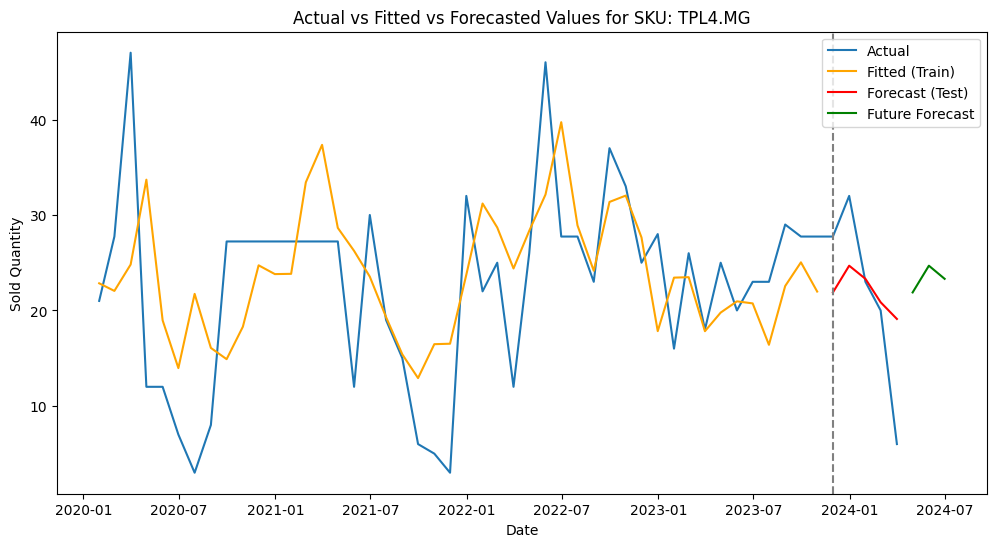

Best model order for SKU TPL4.MG: (4, 0, 7)
Test Set Metrics:
  MAE: 5.488990131859834
  MAPE: 53.62%
  MSE: 52.08396332405347
  RMSE: 7.216922011775759
Actual vs Forecasted values for training set of SKU TPL4.MG:
               Actual  Forecasted
Date                             
2020-01-31  21.000000   22.845472
2020-02-29  27.741533   22.046328
2020-03-31  47.000000   24.809322
2020-04-30  12.000000   33.699784
2020-05-31  12.000000   18.963019
2020-06-30   7.000000   13.959506
2020-07-31   3.000000   21.736383
2020-08-31   8.000000   16.073287
2020-09-30  27.227273   14.895640
2020-10-31  27.227273   18.298415
2020-11-30  27.227273   24.728431
2020-12-31  27.227273   23.808178
2021-01-31  27.227273   23.836238
2021-02-28  27.227273   33.424206
2021-03-31  27.227273   37.347541
2021-04-30  27.227273   28.649575
2021-05-31  12.000000   26.243312
2021-06-30  30.000000   23.540024
2021-07-31  19.000000   19.304004
2021-08-31  15.000000   15.398383
2021-09-30   6.000000   12.912300
2021

In [35]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def calculate_error_metrics(actual, forecasted):
    mae = np.mean(np.abs(actual - forecasted))
    mape = np.mean(np.abs((actual - forecasted) / actual)) * 100
    mse = np.mean((actual - forecasted) ** 2)
    rmse = np.sqrt(mse)
    return mae, mape, mse, rmse

best_models = []

for sku, processed_df in processed_dfs:
    print(f'Processing data for SKU: {sku}')
    
  
    processed_df['Date'] = pd.to_datetime(processed_df[['Year', 'Month']].assign(DAY=1))
    processed_df.set_index('Date', inplace=True)
    
    # Resample SoldQuantity monthly and sum
    df = processed_df['SoldQuantity'].resample('M').sum()

    train_size = math.ceil(len(df) * 0.90)
    train = df[:train_size]
    test = df[train_size:]

    best_mape = np.inf
    best_order = None
    best_model = None

    for p in range(0, 10):
        for q in range(0, 10):
            try:
                model = ARIMA(train, order=(p, 0, q))
                results = model.fit()
                y_pred_test = results.predict(start=test.index[0], end=test.index[-1])
                _, mape, _, _ = calculate_error_metrics(test, y_pred_test)
                if mape < best_mape:
                    best_mape = mape
                    best_model = results
                    best_order = (p, 0, q)
               # print(f"ARIMA({p}, 0, {q}) - MAPE: {mape:.2f}%")
            except Exception as e:
                print(f"ARIMA({p}, 0, {q}) - Exception: {e}")
                continue

    if best_model is not None:
        y_true_train = train.values
        y_pred_train = best_model.predict(start=train.index[0], end=train.index[-1])
        y_true_test = test.values
        y_pred_test = best_model.predict(start=test.index[0], end=test.index[-1])

        mae_test, mape_test, mse_test, rmse_test = calculate_error_metrics(y_true_test, y_pred_test)

        # Forecast the next three months
        forecast_steps = 3
        y_forecast = best_model.forecast(steps=forecast_steps)
        forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

      
        plt.figure(figsize=(12, 6))
        plt.plot(df, label='Actual')
        plt.plot(y_pred_train, label='Fitted (Train)', color='orange')
        plt.plot(y_pred_test, label='Forecast (Test)', color='red')
        plt.plot(forecast_index, y_forecast, label='Future Forecast', color='green')
        plt.axvline(x=test.index[0], color='gray', linestyle='--')
        plt.legend()
        plt.title(f'Actual vs Fitted vs Forecasted Values for SKU: {sku}')
        plt.xlabel('Date')
        plt.ylabel('Sold Quantity')
        plt.show()

        print(f"Best model order for SKU {sku}: {best_order}")

        print(f"Test Set Metrics:")
        print(f"  MAE: {mae_test}")
        print(f"  MAPE: {mape_test:.2f}%")
        print(f"  MSE: {mse_test}")
        print(f"  RMSE: {rmse_test}")

        print(f"Actual vs Forecasted values for training set of SKU {sku}:")
        train_forecast_df = pd.DataFrame({'Actual': y_true_train, 'Forecasted': y_pred_train}, index=train.index)
        print(train_forecast_df)
        
        print(f"Actual vs Forecasted values for test set of SKU {sku}:")
        test_forecast_df = pd.DataFrame({'Actual': y_true_test, 'Forecasted': y_pred_test}, index=test.index)
        print(test_forecast_df)

        print(f"Future Forecast for the next 3 months for SKU {sku}:")
        print(y_forecast)

        best_models.append((sku, best_model, best_order, mae_test, mape_test, mse_test, rmse_test, train_forecast_df, test_forecast_df, forecast_df))
    else:
        print(f"No suitable model found for SKU {sku}.")


SAVE RESULT INTO DATABASE 

80%

In [ ]:
import pandas as pd
import sqlalchemy

forecast_data = pd.DataFrame(columns=['Year', 'Month', 'SKU', 'Forecast'])

for sku, best_model, best_order, mae_test, mape_test, mse_test, rmse_test, train_forecast_df, test_forecast_df, y_forecast in best_models80:
   
    combined_df = pd.concat([train_forecast_df, test_forecast_df, y_forecast])
    combined_df['Year'] = combined_df.index.year
    combined_df['Month'] = combined_df.index.month
    
    combined_df['SKU'] = sku
    

    combined_df.rename(columns={'Forecasted': 'Forecast'}, inplace=True)
    
    # Select only the necessary columns
    combined_df = combined_df[['Year', 'Month', 'SKU', 'Forecast']]
    
    # Append the combined DataFrame to forecast_data
    forecast_data = pd.concat([forecast_data, combined_df])


# Save the forecast_data DataFrame to the SQL database
forecast_data.to_sql('forecasts', engine, if_exists='replace', index=False)

print("Forecast data saved to SQL database successfully.")


Add Pengkalian Forecasting 


In [ ]:
server = 'eu-az-sql-serv1.database.windows.net'
port = '1433'
database = 'TORCHIDNANAS'
username = 'natasyakiyowo'
password = 'Natbil123#0'
driver = 'ODBC Driver 17 for SQL Server'

connection_string = f'mssql+pyodbc://{username}:{password}@{server}:{port}/{database}'

engine = sqlalchemy.create_engine(connection_string, connect_args={'driver': driver})

query = '''
SELECT BOMID,	SKU,	SKURawMaterial,	Qty,	UOM
FROM BOM;
'''
dataBOM = pd.read_sql(query, engine)
dataBOM.head()

In [ ]:
future_materials = []

for result in results:
    sku = result['SKU']
    future_forecast = result['Future Forecast']['Forecast']
    sku_bom = dataBOM[dataBOM['SKU'] == sku]
    
    for idx, forecast in enumerate(future_forecast):
        forecast_date = result['Future Forecast']['Date'].iloc[idx]
        
        for _, row in sku_bom.iterrows():
            future_materials.append({
                'BOMID': row['BOMID'],
                'SKU': sku,
                'SKURawMaterial': row['SKURawMaterial'],
                'Qty': row['Qty'],
                'UOM': row['UOM'],
                'futureMaterial': row['Qty'] * forecast,
                'ForecastDate': forecast_date
            })

# Convert to DataFrame
future_materials_df = pd.DataFrame(future_materials)

# Create a new table in the database
future_materials_df.to_sql('FutureMaterials', engine, if_exists='replace', index=False)

print("Future material requirements table created successfully.")
future_materials_df.head()